# Classification
Understanding Classification vs Regression
While regression predicts continuous values (like insurance charges), classification predicts categories or classes (like whether someone is a smoker or non-smoker). Think of regression as answering "how much?" and classification as answering "which category?"

## Logistic Regression
Despite its name, logistic regression is actually used for classification! Think of it as drawing a line (or boundary) that best separates different groups in your data.

Simple Intuition

While linear regression gives you any number as output (like $5,240 for insurance charges)
Logistic regression gives you a probability between 0 and 1 (like 0.8 probability of being a smoker)
If probability > 0.5, we classify as Yes (1)
If probability < 0.5, we classify as No (0)

Let's implement this to predict whether someone is a smoker:

In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv('insurance.csv')

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Prepare the data
X = df[['age', 'bmi', 'charges']]  # Features
y = df['smoker']  # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Check accuracy
print("Accuracy:", accuracy_score(y_test, predictions))


Accuracy: 0.9402985074626866


Now lets understand the intuition and mathematics behind logistic regression
Logistic regression uses the sigmoid function to convert any input into a probability between 0 and 1. The sigmoid function is:
$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$
where z is the linear combination of features: z = w₁x₁ + w₂x₂ + ... + b
If the output probability is > 0.5, we classify as 1 (e.g., smoker), otherwise as 0 (non-smoker).

The z value is the raw output before sigmoid transformation:
z = w₁×age + w₂×bmi + w₃×charges + b
For example, if:

w₁ (weight for age) = 0.03
w₂ (weight for bmi) = 0.05
w₃ (weight for charges) = 0.001
b (bias) = -2.5

For a person with:

age = 45
bmi = 28
charges = 5000

z = (0.03×45) + (0.05×28) + (0.001×5000) - 2.5 = 4.35
This z is then converted to probability using sigmoid:
probability = 1/(1 + e^(-4.35)) = 0.987
Meaning 98.7% chance of being a smoker.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Create sample data points
x = np.linspace(-10, 10, 100)  # Creates 100 points from -10 to 10
y = sigmoid(x)

# Let's see some specific values
example_points = [-5, -2, 0, 2, 5]
example_results = sigmoid(np.array(example_points))

print("Some example sigmoid values:")
for x, y in zip(example_points, example_results):
    print(f"sigmoid({x:2d}) = {y:.4f}")



Some example sigmoid values:
sigmoid(-5) = 0.0067
sigmoid(-2) = 0.1192
sigmoid( 0) = 0.5000
sigmoid( 2) = 0.8808
sigmoid( 5) = 0.9933


## Decision Trees
Imagine playing a game of "20 Questions" - that's exactly how a decision tree works! It asks a series of yes/no questions to reach a conclusion.
How it Works

Start at the top (root node)
Ask a question about a feature (Is BMI > 30?)
Follow the appropriate path based on the answer
Keep going until you reach a conclusion (leaf node)

If BMI > 30:
    Likely to be a smoker
    (Because there might be a correlation between higher BMI and smoking)

If BMI > 30:
    If Age > 50:
        Very likely to be a smoker
    If Age ≤ 50:
        Less likely to be a smoker

If BMI > 30:
    If Age > 50:
        If Charges > $20,000:
            Almost certainly a smoker
        If Charges ≤ $20,000:
            Probably not a smoker

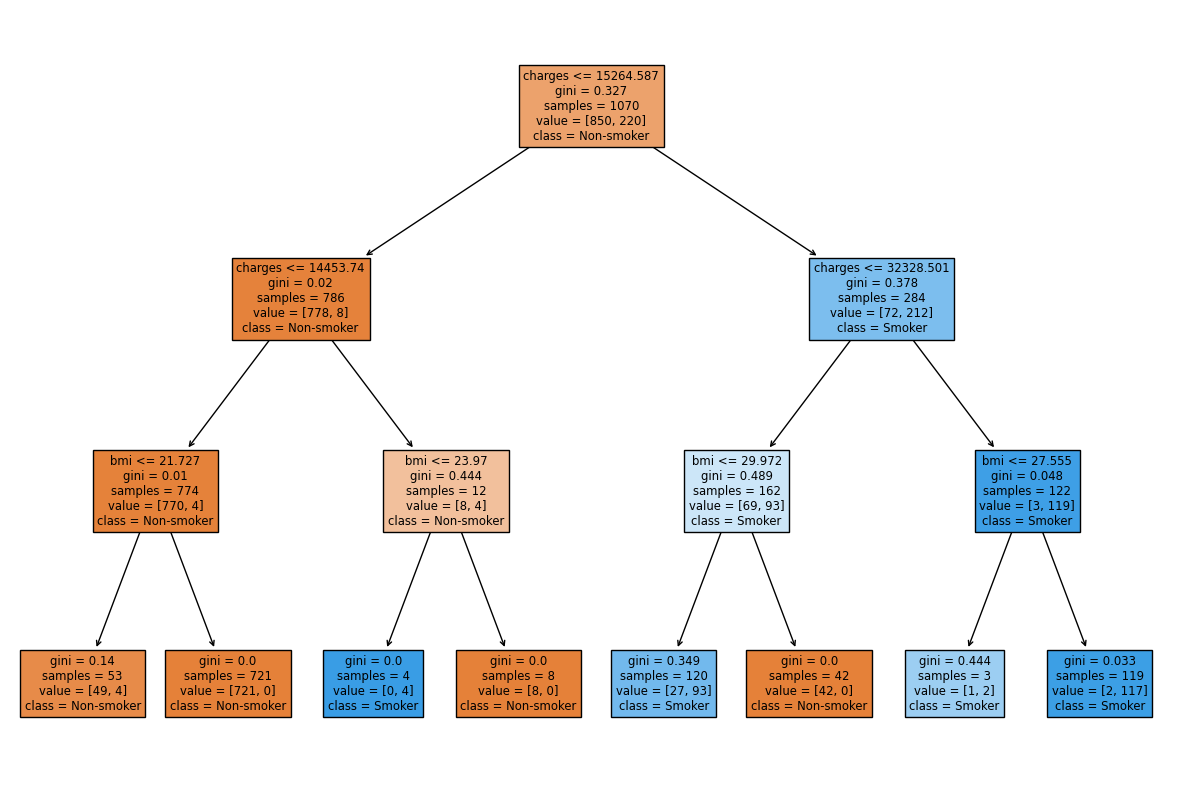

Accuracy: 0.97


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create and train the model
dt_model = DecisionTreeClassifier(max_depth=3)  # Limiting depth for clarity
dt_model.fit(X_train, y_train)

# Visualize the tree
plt.figure(figsize=(15,10))
plot_tree(dt_model, feature_names=['age', 'bmi', 'charges'], 
          class_names=['Non-smoker', 'Smoker'], 
          filled=True)
plt.show()

# Make predictions
dt_predictions = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, dt_predictions)
print(f"Accuracy: {accuracy:.2f}")

## Random Forest
Think of Random Forest as a crowd of decision trees voting on the answer!
Simple Intuition

Instead of one decision tree, we create many trees (like 100)
Each tree:

Gets a random subset of the data to train on
Gets a random subset of features to consider
Makes its own prediction


Final prediction is based on majority vote (for classification) or average (for regression)

Why it Works Better

"Wisdom of the crowd" - multiple trees are less likely to make mistakes
Each tree sees different data, so they learn different patterns
Trees can compensate for each other's mistakes

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

print("\nRandom Forest Performance:")
accuracy = accuracy_score(y_test, rf_predictions)
print(f"Accuracy: {accuracy:.2f}")

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

The same Random Forest can be used for regression by changing how trees vote:

For classification: they vote on the class (smoker/non-smoker)
For regression: they predict numbers and we take the average

## Classification Metrics
Confusion Matrix
A confusion matrix shows how well our model is performing by comparing predicted vs actual values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data
X = df[['age', 'bmi', 'charges']]
y = df['smoker']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Smoker', 'Smoker'],
            yticklabels=['Non-Smoker', 'Smoker'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Understanding the Numbers
In our smoking prediction:

True Negatives (TN): Correctly predicted non-smokers
False Positives (FP): Incorrectly predicted as smokers
False Negatives (FN): Incorrectly predicted as non-smokers
True Positives (TP): Correctly predicted smokers

### Accuracy: 
Overall, how often is the model correct?
Accuracy = (TP + TN) / (TP + TN + FP + FN)

### Precision: 
When model predicts smoker, how often is it right?
Used when false positives are costly
Precision = TP / (TP + FP)

### Recall: 
Out of all actual smokers, how many did we catch
Used when false negatives are costly
Recall = TP / (TP + FN)

### F1 Score: 
The harmonic mean between precision and recall
Use Case: When there’s a trade-off between precision and recall, especially in imbalanced datasets.
Example: In spam classification, if you want to balance false positives (non-spam marked as spam) and false negatives (spam not detected)